<a href="https://colab.research.google.com/github/srudkin12/TDA/blob/main/Anscombes%20Quartet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code file works through the visualisation of Anscombe's Quartet in BallMapper. The work links to the working paper "Guiding Empirical Modelling of Multivariate Data Sets with Topological Data Analysis Ball Mapper" by Dlotko and Rudkin (2022).

We first load in the BallMapper package (Dlotko, 2019). We also use the anscombiser package to construct artificial datasets. More about anscombiser can be found at https://cran.r-project.org/web/packages/anscombiser/index.html

Please note that the installation stage may not be necessary.

In [2]:
install.packages("BallMapper")
install.packages("anscombiser")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(BallMapper)
library(anscombiser)

Data is already within R and can therefore be loaded directly. Here we convert the anscombe data into a data frame

In [4]:
ans<-as.data.frame(anscombe)

Let us view the head of the data to confirm the format is as expected

In [5]:
head(ans)

,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


We may now plot each of the scatter plots in turn. We set the limits on the axes equal in all plots meaning that we need X to range from 0 to 20 and Y from 0 to 15.

The second line of code adds the regression line since all Anscombe's quartet data sets have the same regression line.

Each graph is entered into its own code block:

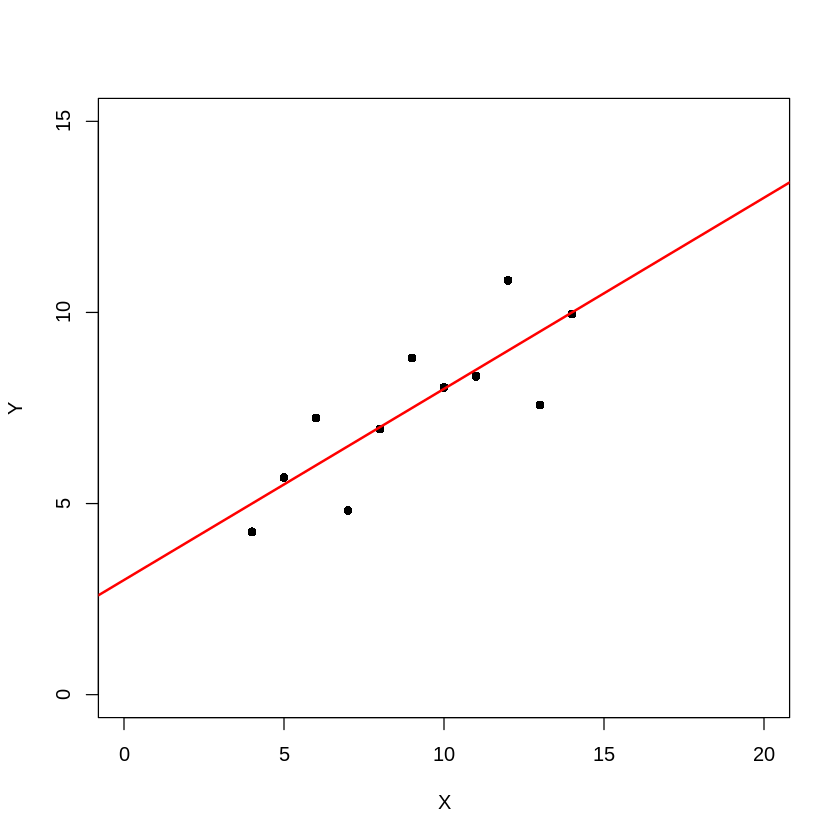

In [6]:
plot(ans$x1,ans$y1,xlab="X",ylab="Y",xlim=c(0,20),ylim=c(0,15),pch=16)
abline(lm(ans$y1~ans$x1),col="red",lwd=2)

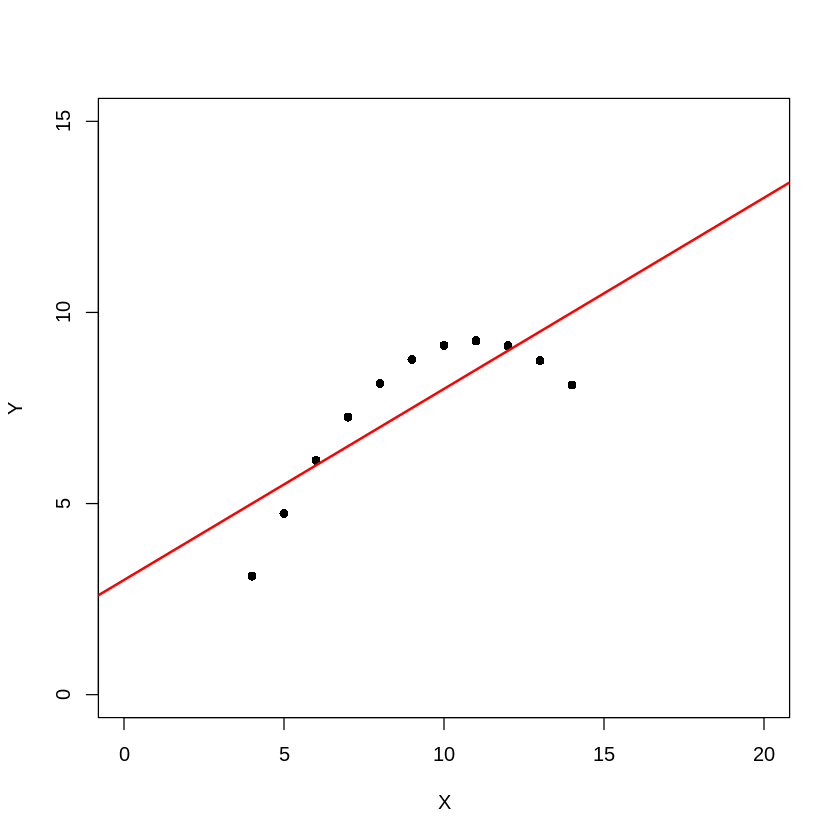

In [7]:
plot(ans$x2,ans$y2,xlab="X",ylab="Y",xlim=c(0,20),ylim=c(0,15),pch=16)
abline(lm(ans$y2~ans$x2),col="red",lwd=2)

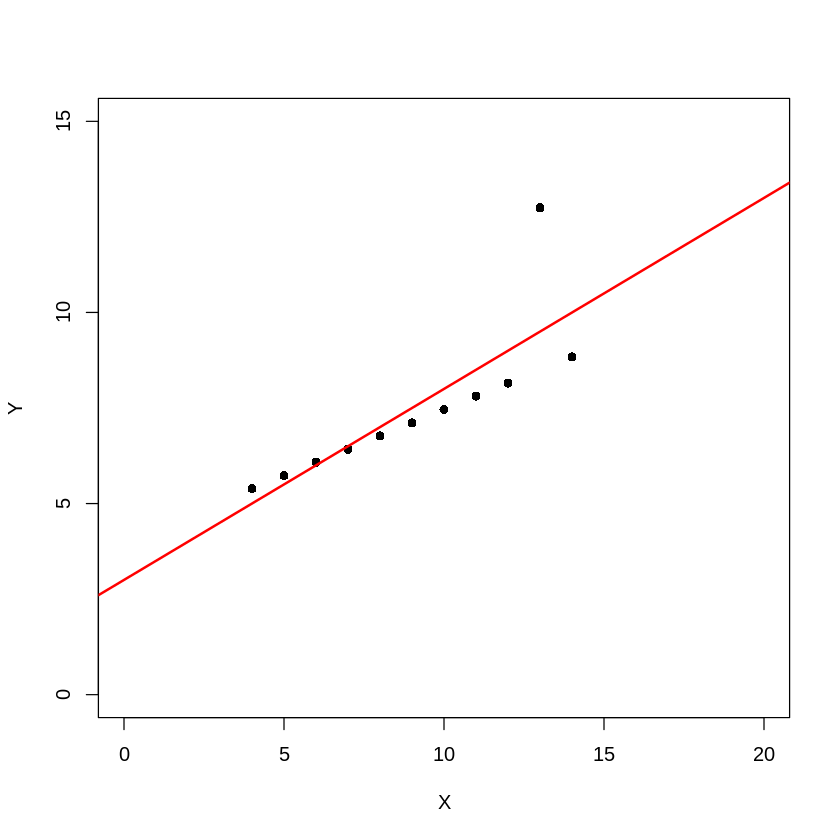

In [8]:
plot(ans$x3,ans$y3,xlab="X",ylab="Y",xlim=c(0,20),ylim=c(0,15),pch=16)
abline(lm(ans$y3~ans$x3),col="red",lwd=2)

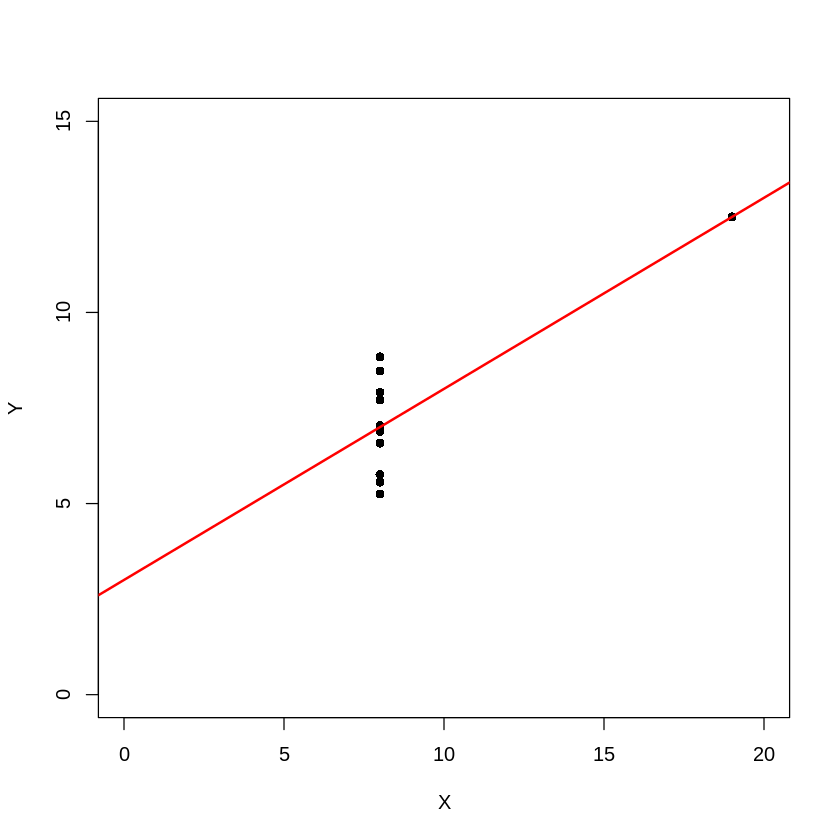

In [9]:
plot(ans$x4,ans$y4,xlab="X",ylab="Y",xlim=c(0,20),ylim=c(0,15),pch=16)
abline(lm(ans$y4~ans$x4),col="red",lwd=2)

Now we construct the Ball Mapper plots. For this we need to set the axis variables (here just X) and the outcome variable (here Y) to be data frames. The radius chosen is the result of some experimentation and you are encouraged to try different values

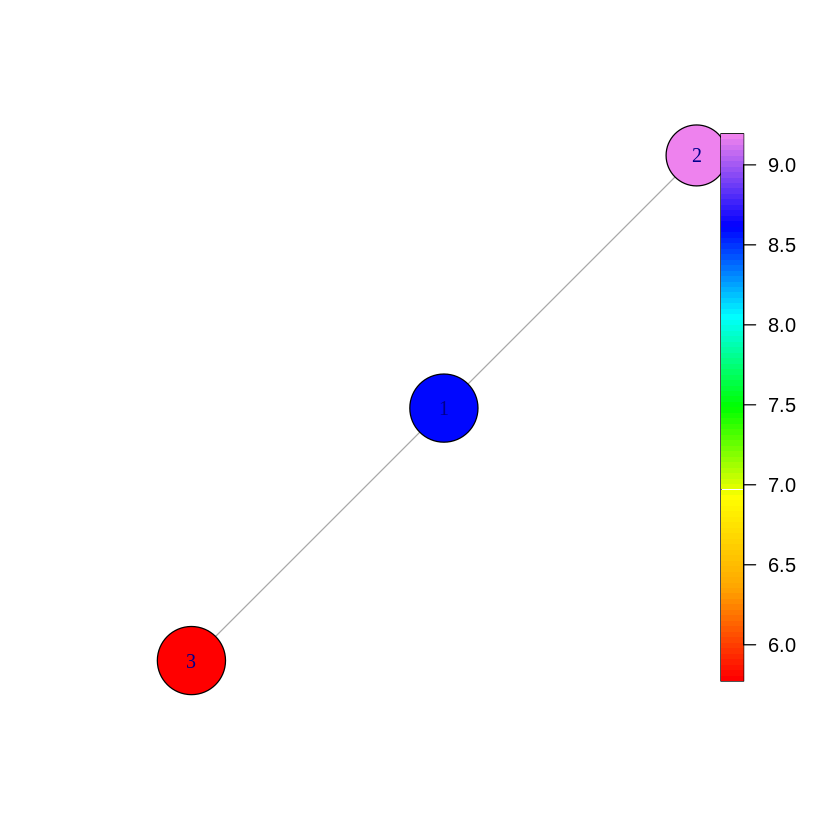

In [10]:
X<-as.data.frame(ans$x1)
Y<-as.data.frame(ans$y1)
bm1<-BallMapper(X,Y,2)
ColorIgraphPlot(bm1,seed_for_plotting = 4)

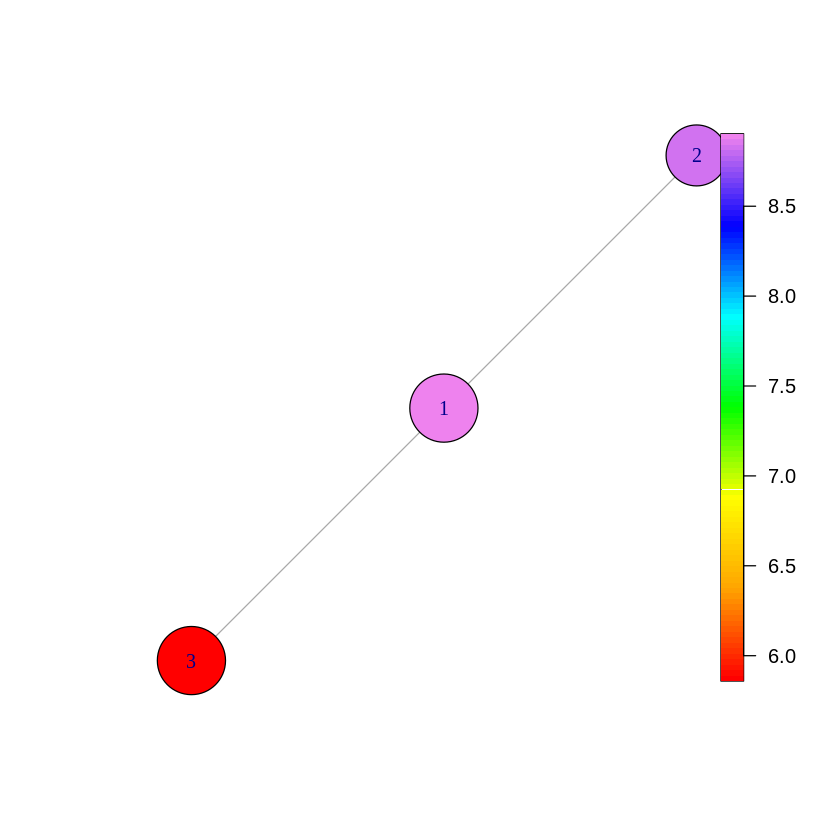

In [11]:
X<-as.data.frame(ans$x2)
Y<-as.data.frame(ans$y2)
bm2<-BallMapper(X,Y,2)
ColorIgraphPlot(bm2,seed_for_plotting = 4)

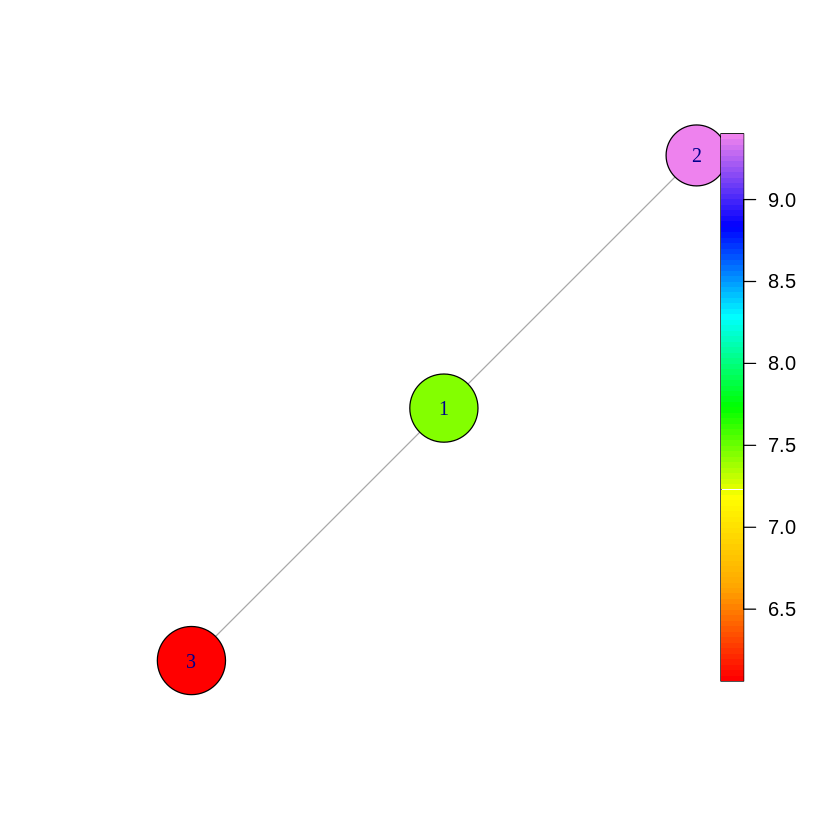

In [12]:
X<-as.data.frame(ans$x3)
Y<-as.data.frame(ans$y3)
bm3<-BallMapper(X,Y,2)
ColorIgraphPlot(bm3,seed_for_plotting = 4)

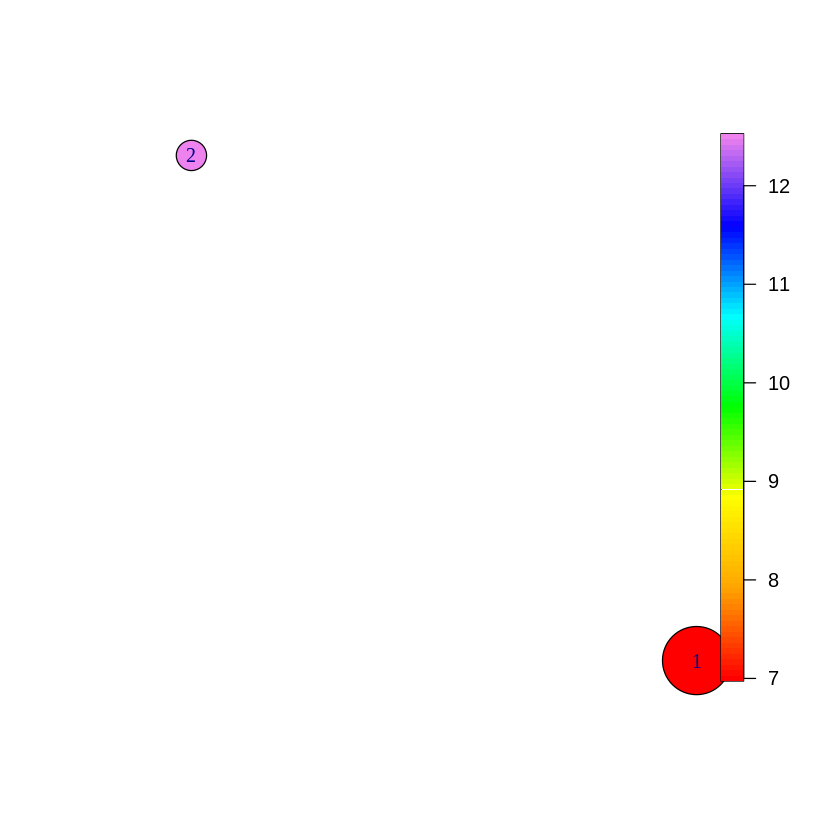

In [13]:
X<-as.data.frame(ans$x4)
Y<-as.data.frame(ans$y4)
bm4<-BallMapper(X,Y,2)
ColorIgraphPlot(bm4,seed_for_plotting = 4)

The four BallMapper plots are different but the inference struggles because there are only 11 data points in the basic Anscombe datasets.

Our next step is to generate some datasets that have the same properties as the Anscombe set. We do this by first creating something akin to the Anscombe set and then using the anscombiser package to ensure that the summary statistics are correct.

We begin with a basic noise on top of the linear function. Let us first obtain the linear regression coefficients for the Anscombe data with 11 data points:

In [14]:
summary(lm(ans$y1~ans$y2))


Call:
lm(formula = ans$y1 ~ ans$y2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.50023 -0.77019  0.05965  0.56227  2.11732 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.8754     1.7080   1.098  0.30069   
ans$y2        0.7500     0.2205   3.402  0.00785 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.416 on 9 degrees of freedom
Multiple R-squared:  0.5625,	Adjusted R-squared:  0.5139 
F-statistic: 11.57 on 1 and 9 DF,  p-value: 0.007852


The intercept is 1.875 and the slope is 0.75. The anscombiser package will correct our data in any case.

**Dataset 1**

We generate 200 random values for the new x1 from the uniform distribution between 4 and 10. A random noise term is created with mean 0 and variance 1. Finally the new y1 values are the x values transformed using the regression equation and then the noise term is added.

We bind x1n and y1n into a dataset and then perform the anscombiser function on that dataset

In [19]:
x1n<-runif(200,4,10)
e1n<-rnorm(200,0,1)
y1n<-1.875+0.75*x1n+e1n
d1n<-as.data.frame(cbind(x1n,y1n))
d1n<-as.data.frame(anscombise(d1n,which=1))

Let us view the dataset that has been created with the plot function

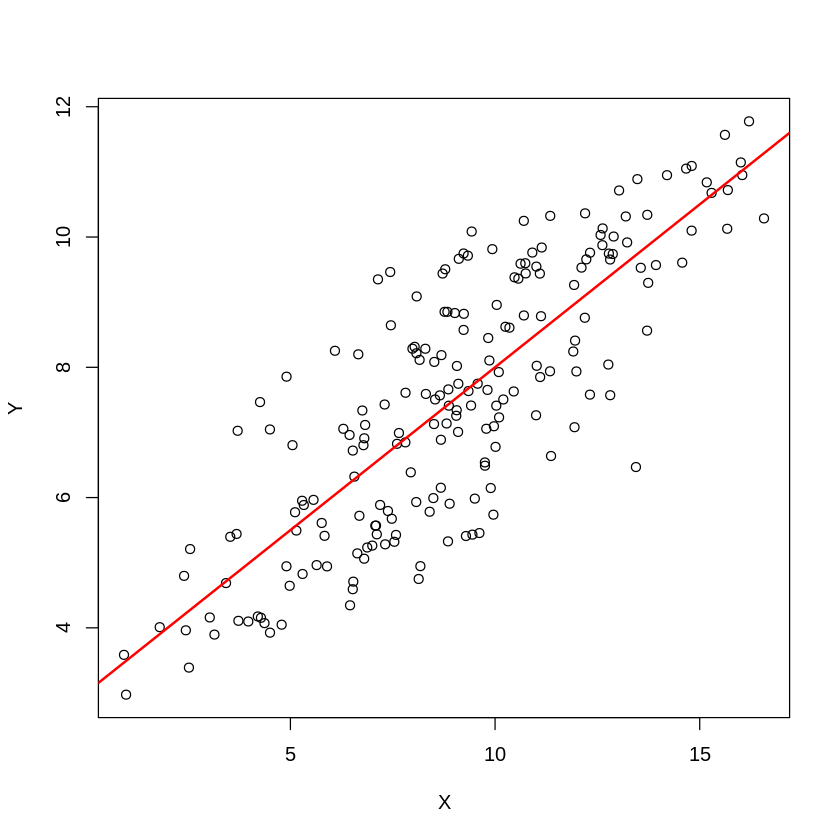

In [20]:
plot(d1n,xlab="X",ylab="Y")
abline(lm(d1n$new2~d1n$new1),lwd=2,col="red")

**Dataset 2**

This dataset is designed to show non-linearity. Therefore we will construct an artificial quadratic function and then let the anscombiser function take care of the summary statistics. Note that we do not add any noise

(Note that the specific choices of parameters for the specification of y2n required some trial and error)

In [48]:
x2n<-runif(200,4,10)
y2n<--5 + 11*x2n - 0.8*x2n^2
d2n<-as.data.frame(cbind.data.frame(x2n,y2n))
d2n<-as.data.frame(anscombise(d2n,which=1))

Let us plot our new dataset to confirm that it has the right shape

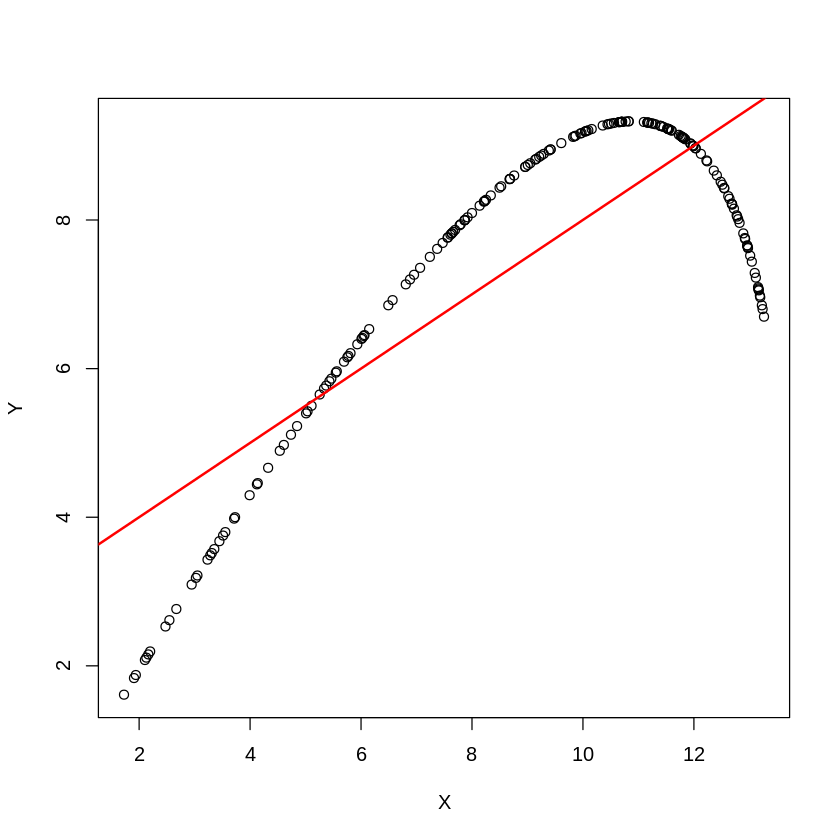

In [50]:
plot(d2n$new1,d2n$new2,xlab="X",ylab="Y")
abline(lm(d2n$new2~d2n$new1),lwd=2,col="red")

**Dataset 3**

This case has a single outlier in the Y direction. Again we will have 200 points and in order to simulate the Anscombe data we will add an increment to 10 points that are next to each other on the X axis. (Again this is done with trial and error)

Note that to find the points on the X axis it is necessary to order the data.

In [166]:
x3n<-runif(200,4,14)
y3n<-5+0.1*x3n
d3n<-as.data.frame(cbind(x3n,y3n))
names(d3n)<-c("x3n","y3n")
d3n<-d3n[order(d3n$x3n),]
d3n$y3n[180:189]<-d3n$y3n[180:189]+5
d3n<-as.data.frame(anscombise(d3n,which=3))

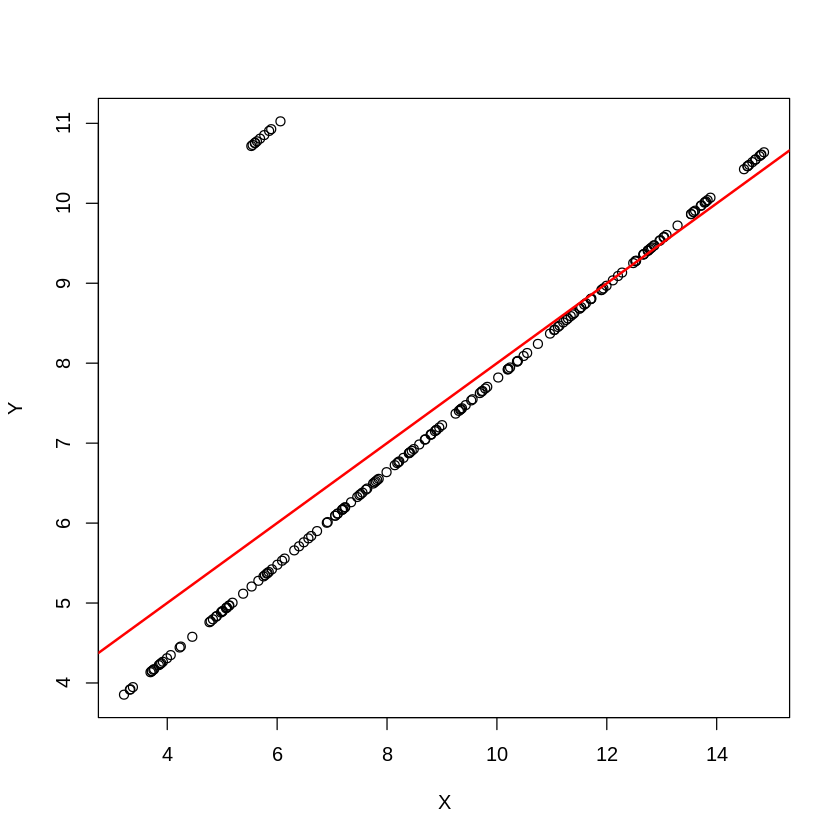

In [167]:
plot(d3n$new1,d3n$new2,xlab="X",ylab="Y")
abline(lm(d3n$new2~d3n$new1),lwd=2,col="red")

Let us plot this to show that it still has the required properties of an outlier in the Y direction. Note that in this case the points form a steeper line than is shown to be the case from the regression line. This is still the same inference as the Anscombe's quartet dataset 3

**Dataset 4**

In this dataset there are outliers in the X direction. The construction process is the same as was used with dataset 3 but now with perturbation to the X.

In this case the aim is to have a set of outliers with high X. In the example these high X also have high Y, but this does not cause trouble for the relationship to BallMapper

In [139]:
x4n<-runif(200,3.9,4.1)
y4n<-runif(200,1,15)
d4n<-as.data.frame(cbind(x4n,y4n))
names(d4n)<-c("x4n","y4n")
d4n<-d4n[order(d4n$y4n),]
d4n$x4n[10:19]<-d4n$x4n[10:19]+5
d4n<-as.data.frame(anscombise(d4n,which=4))

Again we may visualise the dataset with the regression line added

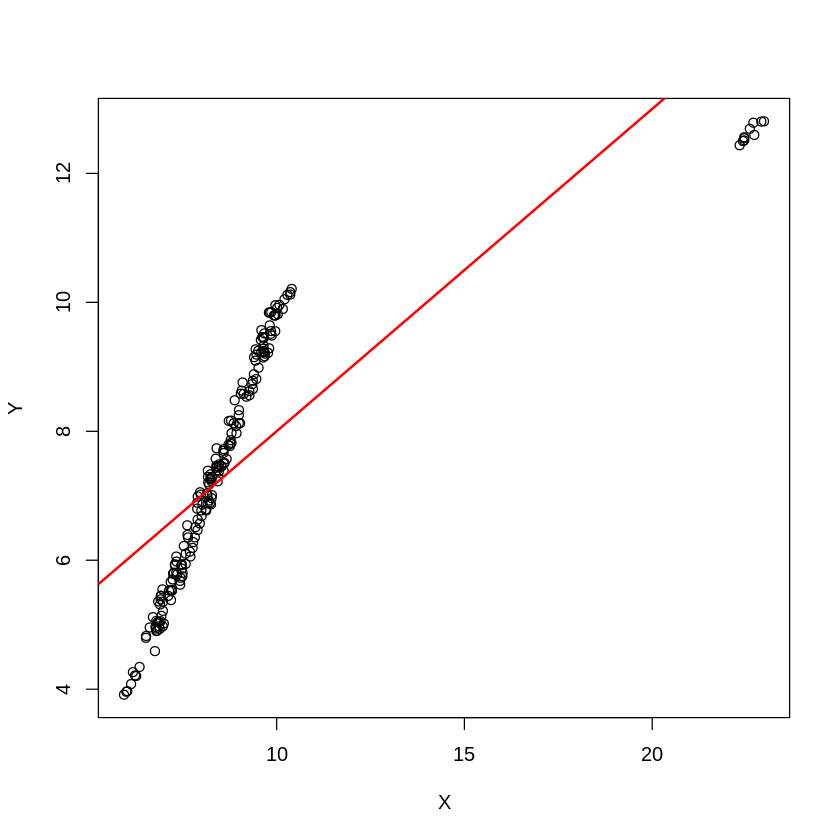

In [141]:
plot(d4n$new1,d4n$new2,xlab="X",ylab="Y")
abline(lm(d4n$new2~d4n$new1),lwd=2,col="red")

**Coefficient Checking**

To check that the regressions from the four new datasets have the same coefficients let us store summary objects from linear regression of the new Y on the new X (new2 on new1). 

We store the coefficients from the summary coef object by binding them together. We may then view the alphas and betas by simply typing alphas or betas into the command line.

Using the two blocks below it can be confirmed that there is the same regression line in all four cases

In [144]:
sm1<-summary(lm(d1n$new2~d1n$new1))
sm2<-summary(lm(d2n$new2~d2n$new1))
sm3<-summary(lm(d3n$new2~d3n$new1))
sm4<-summary(lm(d4n$new2~d4n$new1))
alphas<-cbind(sm1$coef[1,1],sm2$coef[1,1],sm3$coef[1,1],sm4$coef[1,1])
betas<-cbind(sm1$coef[2,1],sm2$coef[2,1],sm3$coef[2,1],sm4$coef[2,1])

In [143]:
alphas

3.000091,3.000091,3.002455,3.001727


In [145]:
betas

0.5000909,0.5000909,0.4997273,0.4999091


**Ball Mapper**

We will now construct Ball Mapper plots for the new datasets. Since the ranges on the X axis are similar we keep the same radius of 2 that was used in the first case

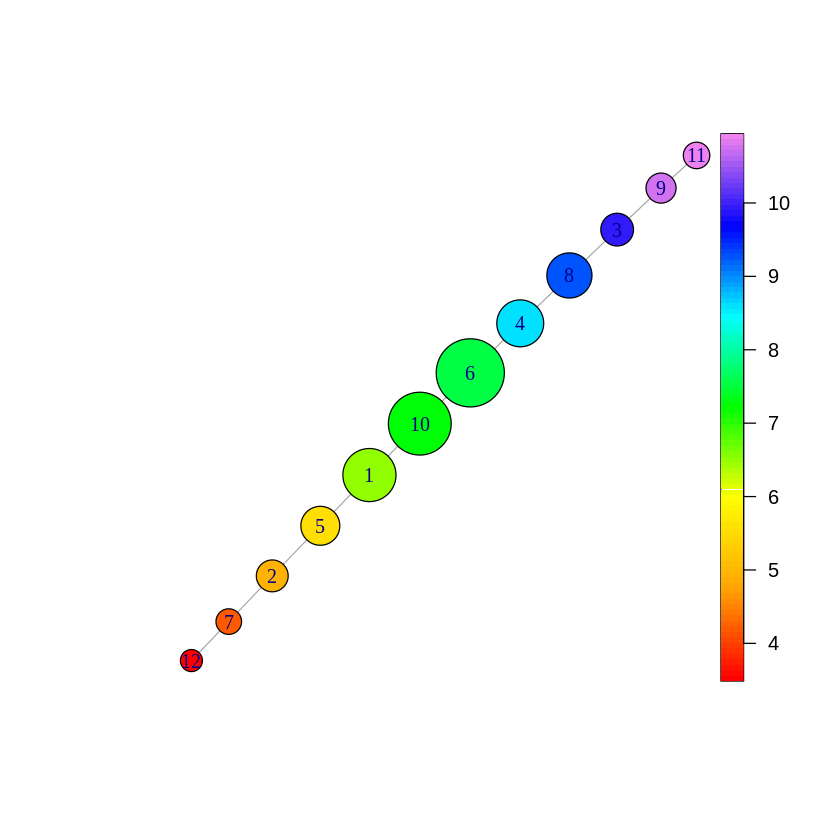

In [170]:
X<-as.data.frame(d1n$new1)
Y<-as.data.frame(d1n$new2)
bm1<-BallMapper(X,Y,1)
ColorIgraphPlot(bm1,seed_for_plotting = 4)

The first BallMapper plot shows the increase in Y values from one end of the graph to the other. This is exactly as would be expected given that the relationship between X and Y is linear

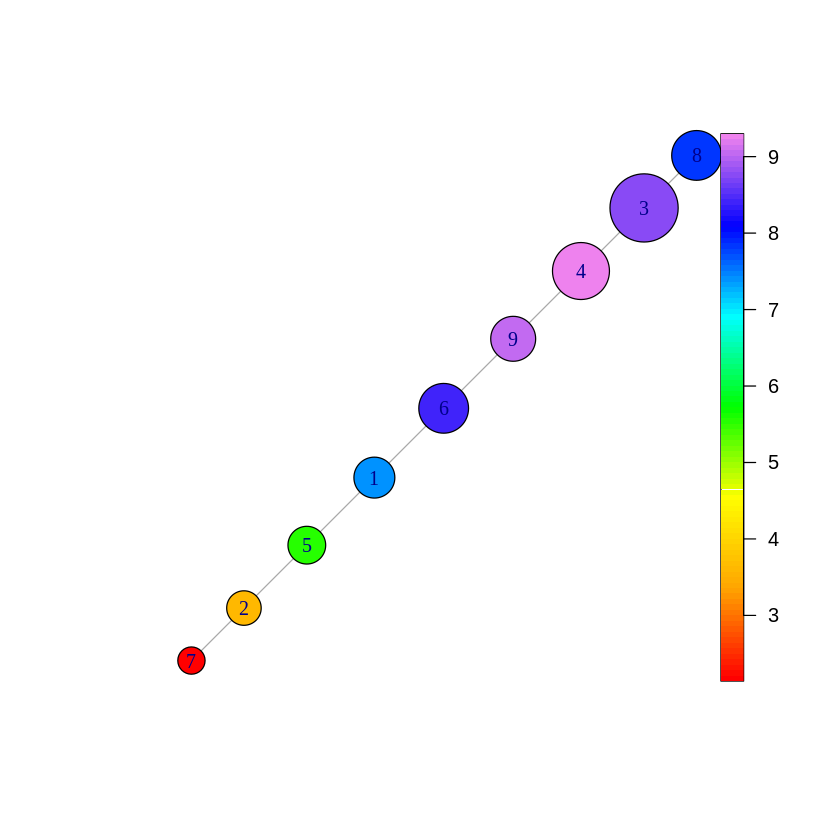

In [153]:
X<-as.data.frame(d2n$new1)
Y<-as.data.frame(d2n$new2)
bm2<-BallMapper(X,Y,1)
ColorIgraphPlot(bm2,seed_for_plotting = 4)

In the second case we see that the Y values get large quickly and the highest values are not at the end of the range of X. This tells us that there may be a non-linear relationship. 

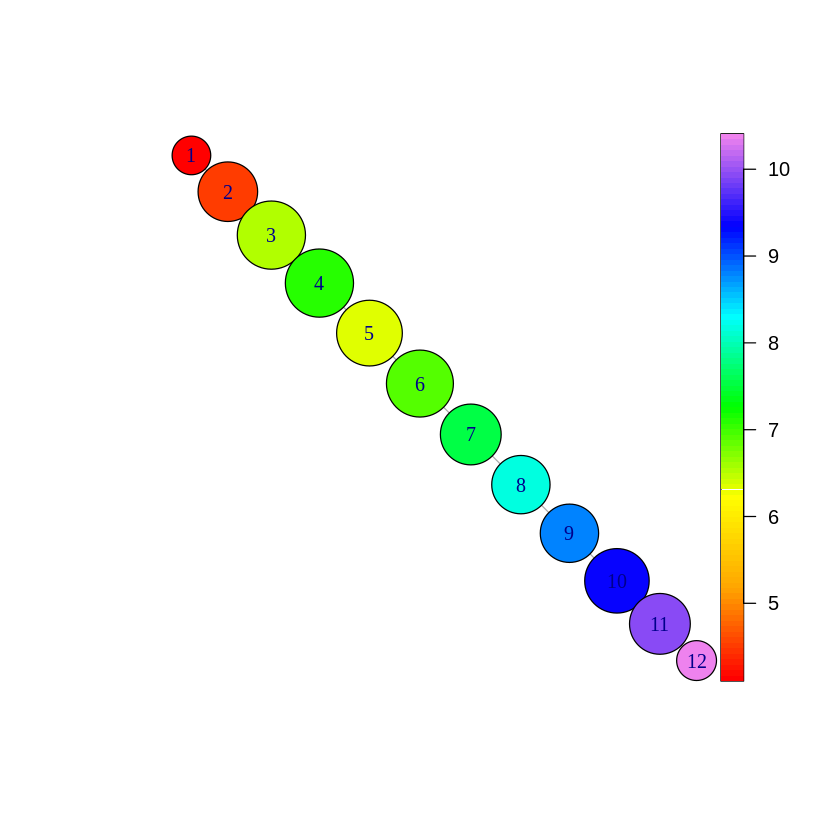

In [168]:
X<-as.data.frame(d3n$new1)
Y<-as.data.frame(d3n$new2)
bm3<-BallMapper(X,Y,1)
ColorIgraphPlot(bm3,seed_for_plotting = 5)

In this third case the key is in ball 4. The majority of the points increase monotonically, but 4 has a higher value than its neighbours. We know this is because of the 10 points with a high Y. The BallMapper plot is thus reflecting the presence of outliers as a break in the relationship of the colour

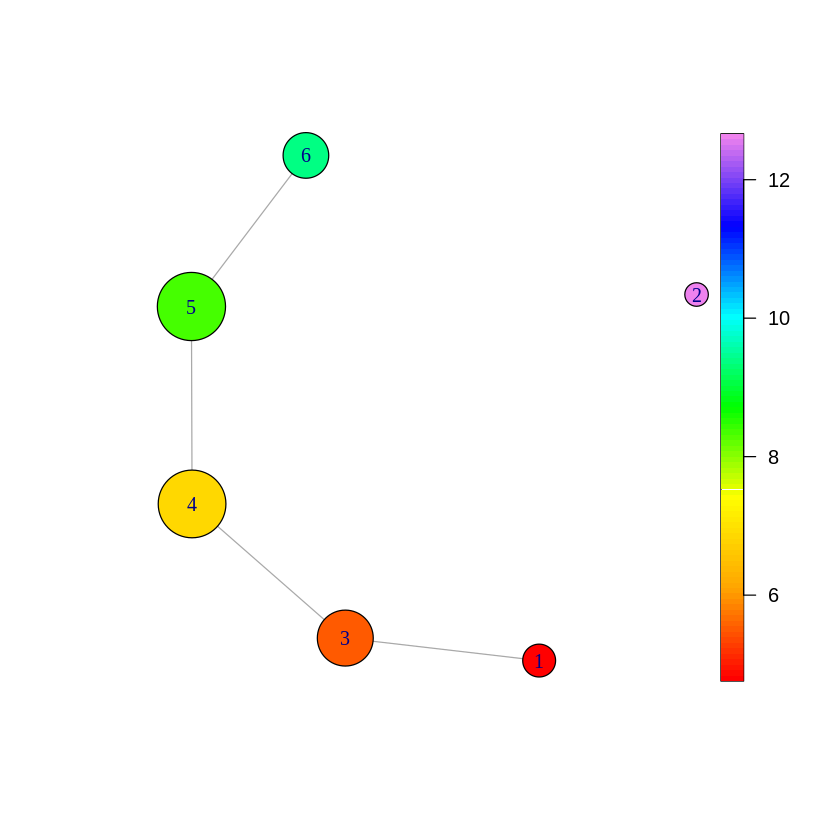

In [169]:
X<-as.data.frame(d4n$new1)
Y<-as.data.frame(d4n$new2)
bm4<-BallMapper(X,Y,1)
ColorIgraphPlot(bm4,seed_for_plotting = 5)

In the final case the data is primarily within a short range of X values. In this example the values are lower and hence the colour ranges from read to green. The highest Y values are associated with the outlier and therefore the outlier has the highest colouration. In regression terms the points in ball 2 are the leverage points for the overall regression of Y on X.

**Summary**

This collaborate notepad is designed to show that the Anscombe's quartet appear differently in BallMapper graphs. This confirms that the BallMapper graph can perform the function of the scatter plot in showing that the data is different. Each of the four BallMapper plots is different in colouration and/or structure.

Further, the exercise demonstrates that the same regression line may emerge from different BallMapper plots. The result is a natural extension of that in Anscombe (1973)

There is much more which can be done, including the replacement of the colouration of the balls with residuals. Residual computation is left as an exercise.

***References:***

Anscombe, F. J. (1973). Graphs in statistical analysis. The American Statistician, 27(1), 17-21.

Dłotko, P. (2019). Ball mapper: A shape summary for topological data analysis. arXiv preprint arXiv:1901.07410.

Dlotko, P. (2019). BallMapper: Create a Ball Mapper graph of the input data. R package version 0.1. 0.
